In [17]:
from random import randint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import resample

from sklearn.preprocessing import MinMaxScaler

from keras.preprocessing import sequence
from keras.utils.np_utils import to_categorical

def mnist_data():
    # download the mnist to the path '~/.keras/datasets/' if it is the first time to be called
    # X shape (60,000 28x28), y shape (10,000, )
    from keras.datasets import mnist
    (X_train, y_train), (X_test, y_test) = mnist.load_data()

    # data pre-processing
    x_train = X_train.reshape(X_train.shape[0], -1) / 255.  # normalize
    x_test = X_test.reshape(X_test.shape[0], -1) / 255.  # normalize
    y_train = to_categorical(y_train, num_classes=10)
    y_test = to_categorical(y_test, num_classes=10)

    return x_train, y_train, x_test, y_test


def plot_pic_sig(x, size):
    plt.imshow(np.reshape(x, (size, size)))
    plt.show()
    plt.plot(x)
    plt.show()


def compress_subsample_value(x_sig, level=2):
    x_sig = resample(x_sig, len(x_sig) // level)
    levels = len(x_sig)//2
    x_sig = pd.cut(x_sig, levels, labels=[str(i) for i in range(levels)])
    x_sig_v = [int(xi) for xi in x_sig]

    # normalize
    max_ = max(x_sig_v)
    x_sig_v = [xi / max_ for xi in x_sig_v]
    return x_sig_v


def compress_subsample(x_sig):
    x_sig = resample(x_sig, len(x_sig) // 2)
    levels = len(x_sig)//2
    x_sig = pd.cut(x_sig, levels, labels=[str(i) for i in range(levels)])
    x_sig_str = "_".join(x_sig)
    return x_sig_str




In [18]:
x_train, y_train, x_test, y_test = mnist_data()
print(x_train.shape)

(60000, 784)


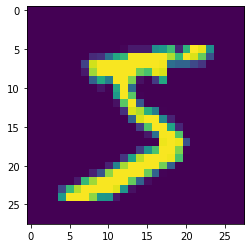

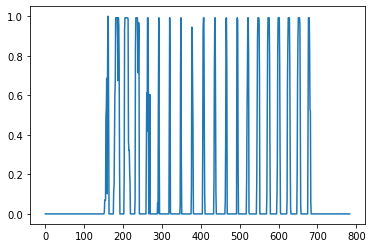

In [19]:
x = x_train[0]

plot_pic_sig(x, 28)

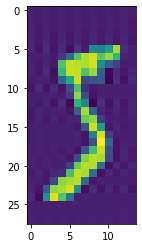

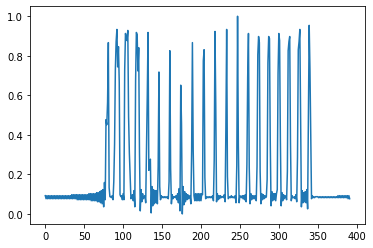

In [20]:
x = compress_subsample_value(x, 2)
plt.imshow(np.reshape(x, (28, 28//2)))
plt.show()
plt.plot(x)
plt.show()


196


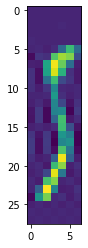

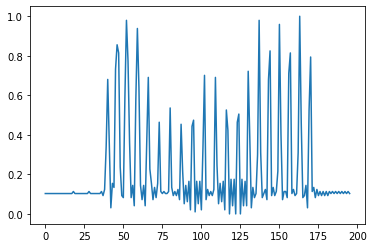

In [21]:
x = compress_subsample_value(x, 2)
print(len(x))
plt.imshow(np.reshape(x, (28, 28//4)))
plt.show()
plt.plot(x)
plt.show()

In [22]:
print(len(x))
print(len(set(x)))

196
57
